In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [15]:
fig_scale = 0.7
FIGSIZE = (14*fig_scale, 8*fig_scale)

In [4]:
with open('..//data//women_hours_empirical', 'rb') as f:
    women_hours = pickle.load(f)

In [22]:
df_action = pd.read_pickle('..//data//dqi_actions_model1_opt_beta_simulations.pkl')
df = pd.read_pickle('..//data//dqi_model1_opt_beta_simulations.pkl')

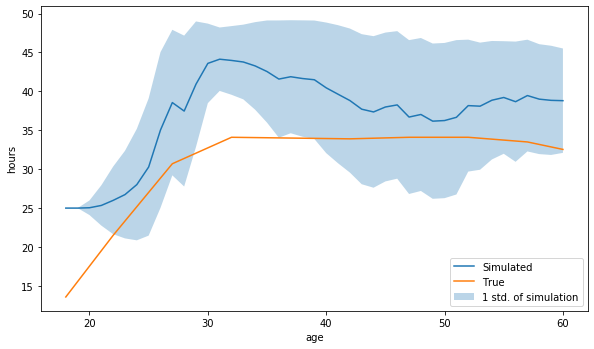

In [12]:
mean = np.array(df_action.drop('episode',axis=1).loc[df_action['actions'] > 0].groupby('Q').mean())
std = np.array(df_action.drop('episode',axis=1).loc[df_action['actions'] > 0].groupby('Q').std())

upper_bound = mean + std
lower_bound = mean - std

f, ax = plt.subplots(1, 1, figsize=FIGSIZE)
ax.plot(range(18,61), mean, label='Simulated')
ax.plot(range(18,61), women_hours[18:61], label='True')

ax.fill_between(range(18,61), upper_bound.reshape(-1), lower_bound.reshape(-1), alpha=0.3, label='1 std. of simulation')
ax.set_xlabel('age')
ax.set_ylabel('hours')
ax.legend(loc='lower right')

f.savefig("..//figures//dgi_estimation")

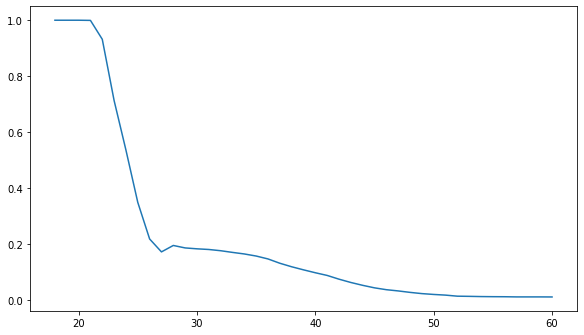

In [18]:
f, ax = plt.subplots(1,1, figsize=FIGSIZE)
women_frac = df_action.drop('episode',axis=1).loc[df_action['actions'] > 0].groupby('Q').count() / 5000
ax.plot(women_frac)



In [20]:
df_action

,actions,episode,Q
0,25,0,18
1,25,0,19
2,25,0,20
3,25,0,21
4,25,0,22
...,...,...,...
214995,0,4999,56
214996,0,4999,57
214997,0,4999,58
214998,0,4999,59


In [21]:
df

,actions,episode,Q
0,25,0,18
1,25,0,19
2,25,0,20
3,25,0,21
4,25,0,22
...,...,...,...
214995,0,4999,56
214996,0,4999,57
214997,0,4999,58
214998,0,4999,59


In [23]:
df.merge(df_action)

,rewards,episode,Q
0,42.490283,0,18
1,42.560202,0,19
2,42.664128,0,20
3,42.724631,0,21
4,42.783542,0,22
...,...,...,...
214995,43.561982,4999,56
214996,43.542946,4999,57
214997,43.522666,4999,58
214998,43.501099,4999,59
